In [3]:
import pandas as pd
import numpy as np

In [82]:
dataset = pd.read_csv("C:/Users/llift/OneDrive/Desktop/3.2/github/star_classification.csv")

In [83]:
print(dataset.head(10))

         obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   
5  1.237680e+18  340.995121  20.589476  23.48827  23.33776  21.32195   
6  1.237679e+18   23.234926  11.418188  21.46973  21.17624  20.92829   
7  1.237679e+18    5.433176  12.065186  22.24979  22.02172  20.34126   
8  1.237661e+18  200.290475  47.199402  24.40286  22.35669  20.61032   
9  1.237671e+18   39.149691  28.102842  21.74669  20.03493  19.17553   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
1  21.16812  21.61427    4518       301        5       

0        True
1        True
2        True
3        True
4        True
         ... 
99995    True
99996    True
99997    True
99998    True
99999    True
Name: class, Length: 100000, dtype: bool

In [87]:
import pandas as pd
import numpy as np
# Check class distribution
class_distribution = dataset['class'].value_counts()
print("Class Distribution Before Balancing:")
print(class_distribution)

# Determine the majority class
majority_class = class_distribution.idxmax()
minority_class = class_distribution.idxmin()
# Get the number of samples in the majority class
majority_class_count = class_distribution[majority_class]
minority_class_count = class_distribution[minority_class]
# Find indices of majority class samples
majority_indices = dataset[dataset['class'] == majority_class].index

# Randomly select majority class samples to drop
drop_indices = np.random.choice(majority_indices, size=majority_class_count - minority_class_count, replace=False)

# Drop selected majority class samples
balanced_df = dataset.drop(drop_indices)

# Check class distribution after balancing
balanced_class_distribution = balanced_df['class'].value_counts()
print("\nClass Distribution After Balancing:")
print(balanced_class_distribution)

Class Distribution Before Balancing:
class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

Class Distribution After Balancing:
class
STAR      21594
GALAXY    18961
QSO       18961
Name: count, dtype: int64


In [91]:
le = LabelEncoder()
le1 = le.fit_transform(balanced_df['class'])

In [92]:
from sklearn.preprocessing import LabelEncoder
lebel = LabelEncoder()
lebelencode = lebel.fit_transform(balanced_df['class'])
balanced_df['class'] = lebelencode

In [93]:
balanced_df['class']

2        0
3        0
4        0
5        1
6        1
        ..
99983    0
99987    0
99990    0
99993    0
99996    0
Name: class, Length: 59516, dtype: int32

In [94]:
X = balanced_df[['obj_ID','alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'redshift',
       'plate', 'MJD', 'fiber_ID']]
Y = balanced_df[['class']]

In [95]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3, 
                                                 random_state=42,
                                                 shuffle 
                                                 = True,stratify= Y)

In [96]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [97]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [98]:
model = LogisticRegression()
model.fit(X_train_std,Y_train)

C:\Users\llift\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\llift\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [99]:
model.score(X_test_std,Y_test)

0.948473816858023

In [100]:
coefficients = model.coef_

In [101]:
print(coefficients)

[[ 1.45477542e-02 -1.23103249e-02 -4.53120066e-02  7.01904752e+00
   4.68105844e+00  1.04455625e+00 -1.55975245e+00 -9.38051743e-01
   1.45520219e-02  0.00000000e+00 -4.32997959e-02  4.53115258e-02
   3.21639936e-01  1.47975574e+01  3.21640912e-01 -7.00410253e-01
   3.47263277e-02]
 [ 2.28612863e-02  8.05451884e-02  1.89388215e-01 -8.30274338e+00
  -2.64094232e+00 -2.85728341e+00  2.66957060e+00  5.55446057e+00
   2.28643623e-02  0.00000000e+00 -3.14602773e-02  2.28082408e-02
  -9.72926616e-02  1.94403139e+01 -9.72935111e-02 -7.41901037e-02
   1.46102515e-02]
 [-3.74090405e-02 -6.82348635e-02 -1.44076209e-01  1.28369587e+00
  -2.04011611e+00  1.81272715e+00 -1.10981815e+00 -4.61640883e+00
  -3.74163842e-02  0.00000000e+00  7.47600732e-02 -6.81197666e-02
  -2.24347275e-01 -3.42378713e+01 -2.24347401e-01  7.74600357e-01
  -4.93365792e-02]]


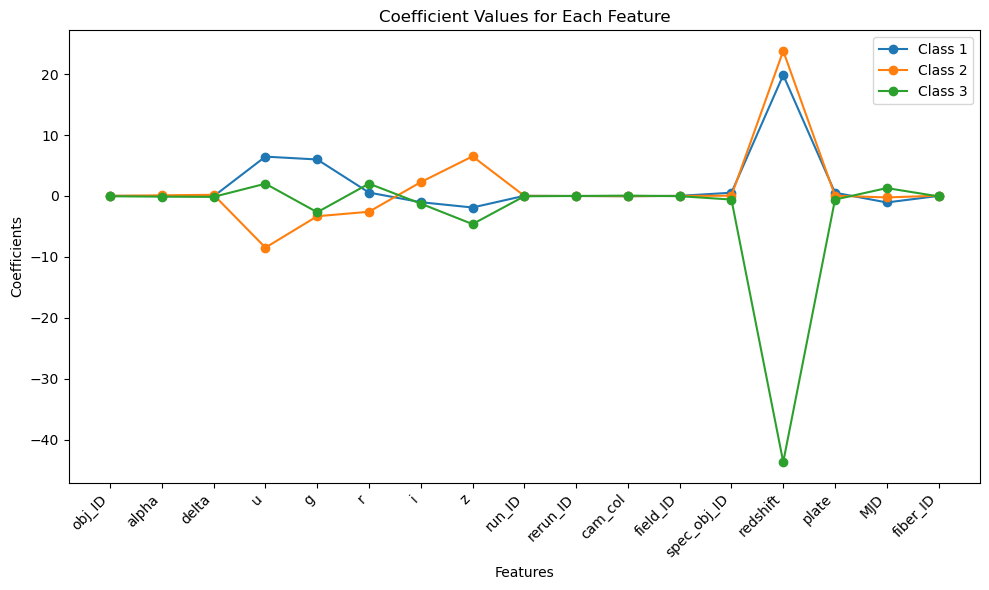

In [102]:
# Assuming coefficients is your array
coefficients = np.array([[ 2.56204307e-02, -8.20590589e-03, -4.96072520e-02, 6.45704147e+00,
                           5.98922276e+00, 5.61055467e-01, -1.01860004e+00, -1.88944441e+00,
                           2.56241128e-02, 0.00000000e+00, -3.79940768e-02, 2.28999222e-02,
                           5.35656296e-01, 1.98372620e+01, 5.35658866e-01, -1.06259750e+00,
                           1.58195113e-02],
                         [ 1.82605522e-02, 1.10349625e-01, 1.90806512e-01, -8.47177248e+00,
                           -3.32182385e+00, -2.58644852e+00, 2.27083915e+00, 6.50276964e+00,
                           1.82627867e-02, 0.00000000e+00, -2.29905841e-02, 6.75351104e-03,
                           4.89997596e-02, 2.38030912e+01, 4.89989614e-02, -2.34850214e-01,
                           4.73601078e-02],
                         [-4.38809829e-02, -1.02143719e-01, -1.41199260e-01, 2.01473102e+00,
                           -2.66739890e+00, 2.02539305e+00, -1.25223911e+00, -4.61332522e+00,
                           -4.38868995e-02, 0.00000000e+00, 6.09846609e-02, -2.96534333e-02,
                           -5.84656056e-01, -4.36403532e+01, -5.84657828e-01, 1.29744771e+00,
                           -6.31796191e-02]])

# Feature names (replace these with your actual feature names)
feature_names = ['obj_ID','alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'redshift',
       'plate', 'MJD', 'fiber_ID']

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
index = np.arange(len(feature_names))

for i, label in enumerate(range(len(coefficients))):
    ax.plot(index, coefficients[label], marker='o', label=f'Class {i + 1}')

ax.set_xlabel('Features')
ax.set_ylabel('Coefficients')
ax.set_title('Coefficient Values for Each Feature')
ax.set_xticks(index)
ax.set_xticklabels(feature_names, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

In [105]:
balanced_df_important_feature_only = balanced_df[['u', 'g', 'r', 'i', 'z', 'redshift','class']]


In [106]:
df = pd.DataFrame(balanced_df_important_feature_only)

# Specify the path where you want to save the CSV file
csv_file_path = 'balanced_df_important_feature_only.csv'

# Export the DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)